### Основная задача в данной работе проведение EDA и анализ настроения твитов.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud

In [2]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
)

In [3]:
df = pd.read_csv('trump_insult_tweets_2014_to_2021.csv', index_col=0) 

In [4]:
df.head(5)

date          target  \
1  2014-10-09  thomas-frieden   
2  2014-10-09  thomas-frieden   
3  2015-06-16     politicians   
4  2015-06-24      ben-cardin   
5  2015-06-24      neil-young   

                                              insult  \
1                                               fool   
2                                               DOPE   
3                             all talk and no action   
4  It's politicians like Cardin that have destroy...   
5                                    total hypocrite   

                                               tweet  
1  Can you believe this fool, Dr. Thomas Frieden ...  
2  Can you believe this fool, Dr. Thomas Frieden ...  
3  Big time in U.S. today - MAKE AMERICA GREAT AG...  
4  Politician @SenatorCardin didn't like that I s...  
5  For the nonbeliever, here is a photo of @Neily...

In [5]:
df['target'].describe()

count         10358
unique          866
top       the-media
freq           1287
Name: target, dtype: object

In [6]:
df['insult'].describe()

count         10360
unique         6729
top       Fake News
freq            431
Name: insult, dtype: object

In [7]:
df['tweet'].describe()

count                                                 10360
unique                                                 5673
top       The Fake News Networks, those that knowingly h...
freq                                                     16
Name: tweet, dtype: object

Колличество уникальных значений указывает на то что некоторые твиты повторяются в датасете. Это получается в результате того что в некоторых твитах могло быть задето несколько человек

In [8]:
tweets = df.tweet.tolist()
tweets = list(set(tweets)) 
len(tweets)

5673

5673 это реальное количество твитов которое было написано на аккаунте за интервал с 2015 по 2021 год.

In [9]:
ndf = df.drop_duplicates(subset=['tweet'])

Подсчитаем колличество символов в твитах

<ipython-input-10-6161609d2883>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['tweet_len'] = ndf['tweet'].apply(len)


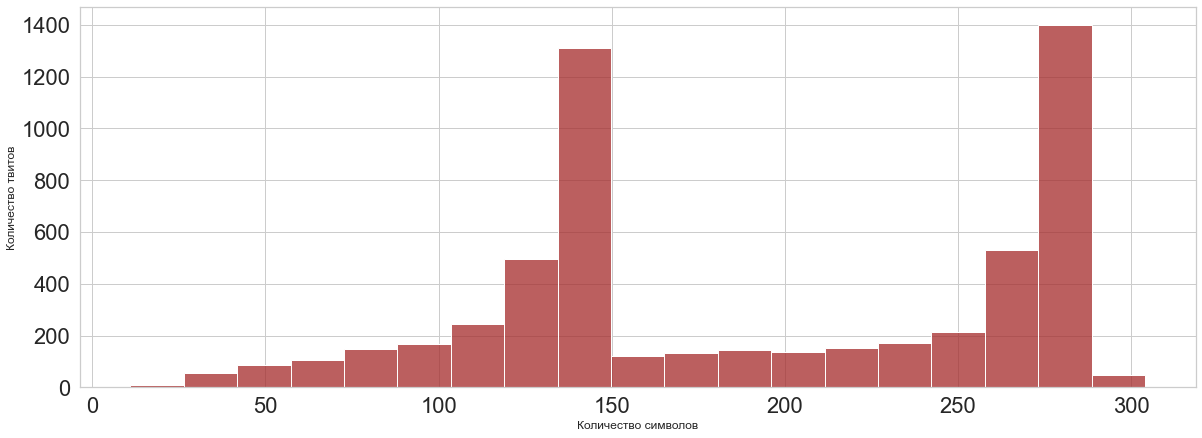

In [10]:
ndf['tweet_len'] = ndf['tweet'].apply(len)
plt.ylabel('Количество твитов', fontsize=12);
plt.xlabel('Количество символов', fontsize=12);
tweet_len_vis = sns.histplot(ndf.tweet_len, color="brown")

Отчетливо видно что график наибольшего колличество символов имеет два пика в районе 140 и 280 символов. Cвязанно с тем что в 2017 году твиттер увеличил максимальный размер сообшений, это хорошо видно следующем графике

<ipython-input-13-d13c24700d38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf["year"] = pd.DatetimeIndex(ndf["date"]).year


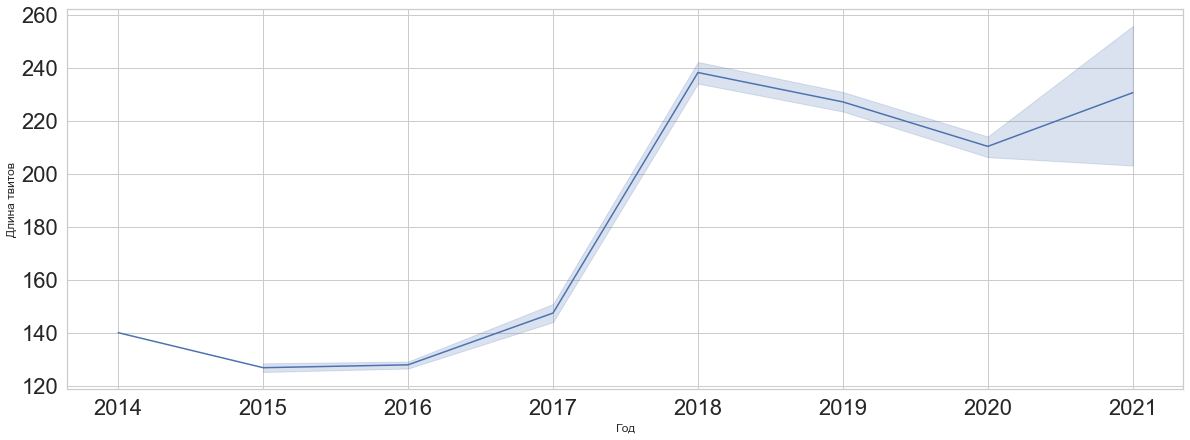

In [13]:
ndf["year"] = pd.DatetimeIndex(ndf["date"]).year
sns.lineplot(data=ndf, x="year", y="tweet_len")
plt.ylabel('Длина твитов', fontsize=12);
plt.xlabel('Год', fontsize=12);

Построив график с колличеством твитов Трампа по годам можно увидеть, что наибольшую активность он проявлял в последний год своего президентсва.

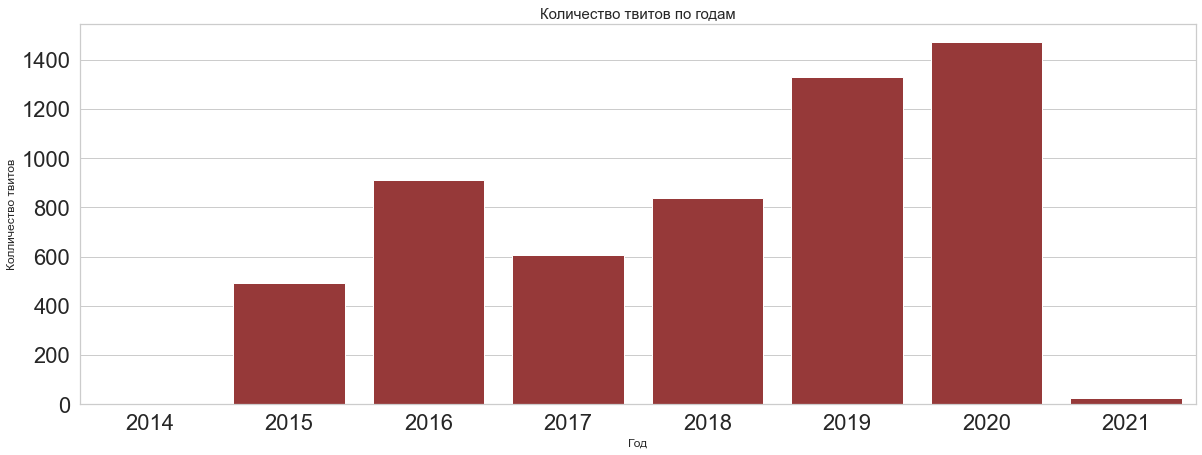

In [14]:
year_df = ndf.groupby('year', as_index=False).agg({'tweet':'count'})
fig = sns.barplot(x = year_df.year, y = year_df.tweet, color="brown")
plt.title('Количество твитов по годам', fontsize=15);
plt.ylabel('Колличество твитов', fontsize=12);
plt.xlabel('Год', fontsize=12);

In [15]:
df["year"] = pd.DatetimeIndex(df["date"]).year

Данная таблица показывает самые частые цели для атаки по годам.

In [16]:
target_by_year = df.groupby(['year', 'target'])['tweet'].agg('count')\
  .reset_index()\
  .sort_values(by = ['tweet', 'year'], ascending=False)
target_by_year.head(10)

year               target  tweet
248   2016      hillary-clinton    422
955   2019            the-media    361
1244  2020            the-media    340
1117  2020            joe-biden    325
794   2019            democrats    281
702   2018            the-media    261
495   2017            the-media    240
713   2018         trump-russia    204
838   2019  impeachment-inquiry    167
1055  2020            democrats    150

Ниже представленны самые частые фразы используемые Трампом в своих твитах, отсортированные по целям.

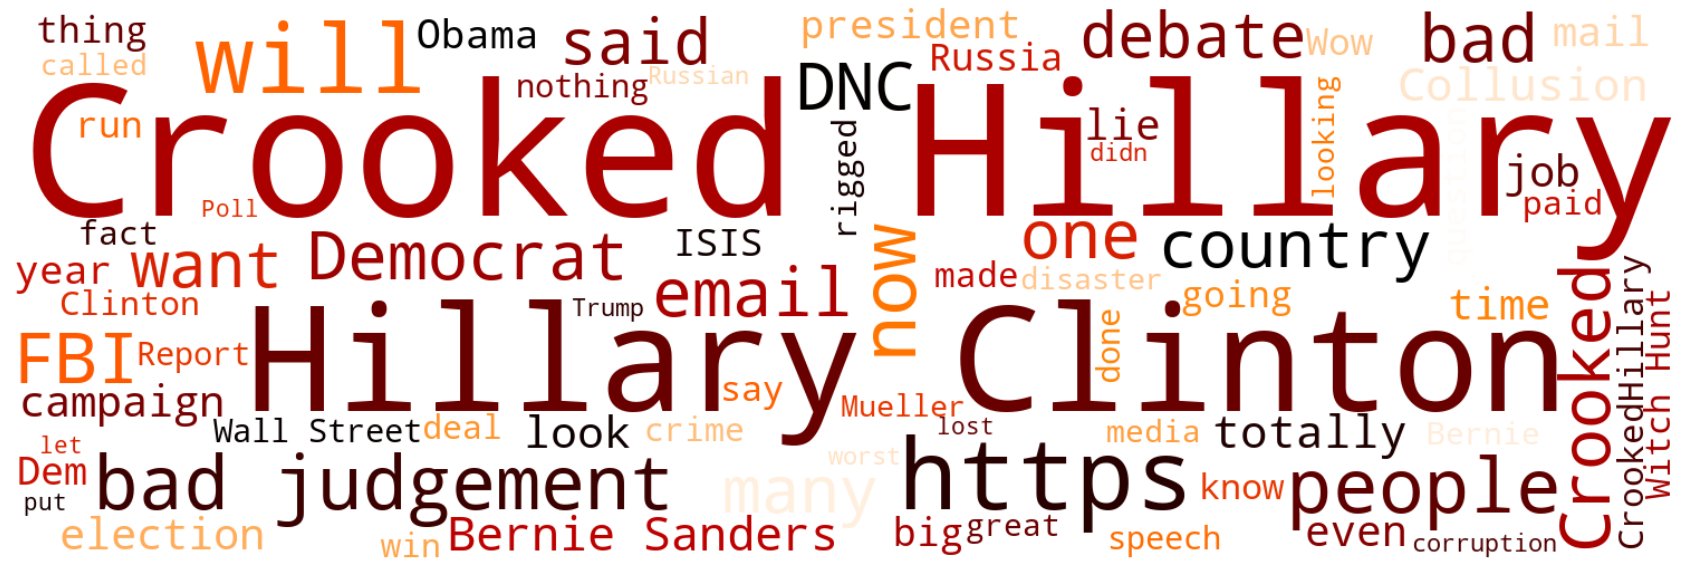

In [17]:
df_media=df.loc[df['target']=='hillary-clinton']
tweet_text = ' '.join(df_media['tweet'].tolist())
stopwords=set(STOPWORDS)
wordcloud = WordCloud(width=1500, height=500, stopwords=stopwords, max_font_size=500, 
                      max_words=75, min_word_length = 3, colormap="gist_heat", 
                      background_color="white").generate(tweet_text)
plt.subplots(figsize=(30,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

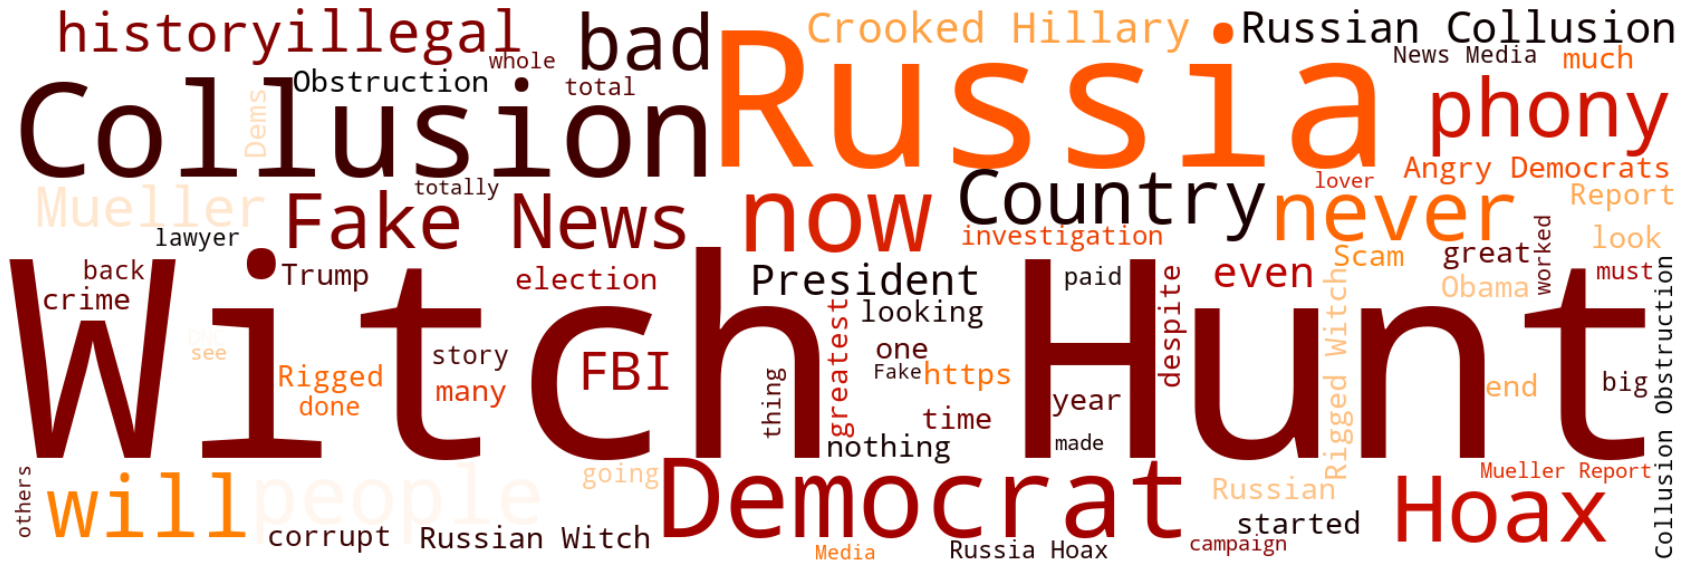

In [18]:
df_media=df.loc[df['target']=='trump-russia']
tweet_text = ' '.join(df_media['tweet'].tolist())
stopwords=set(STOPWORDS)
wordcloud = WordCloud(width=1500, height=500, stopwords=stopwords, max_font_size=500, 
                      max_words=75, min_word_length = 3, colormap="gist_heat", 
                      background_color="white").generate(tweet_text)
plt.subplots(figsize=(30,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

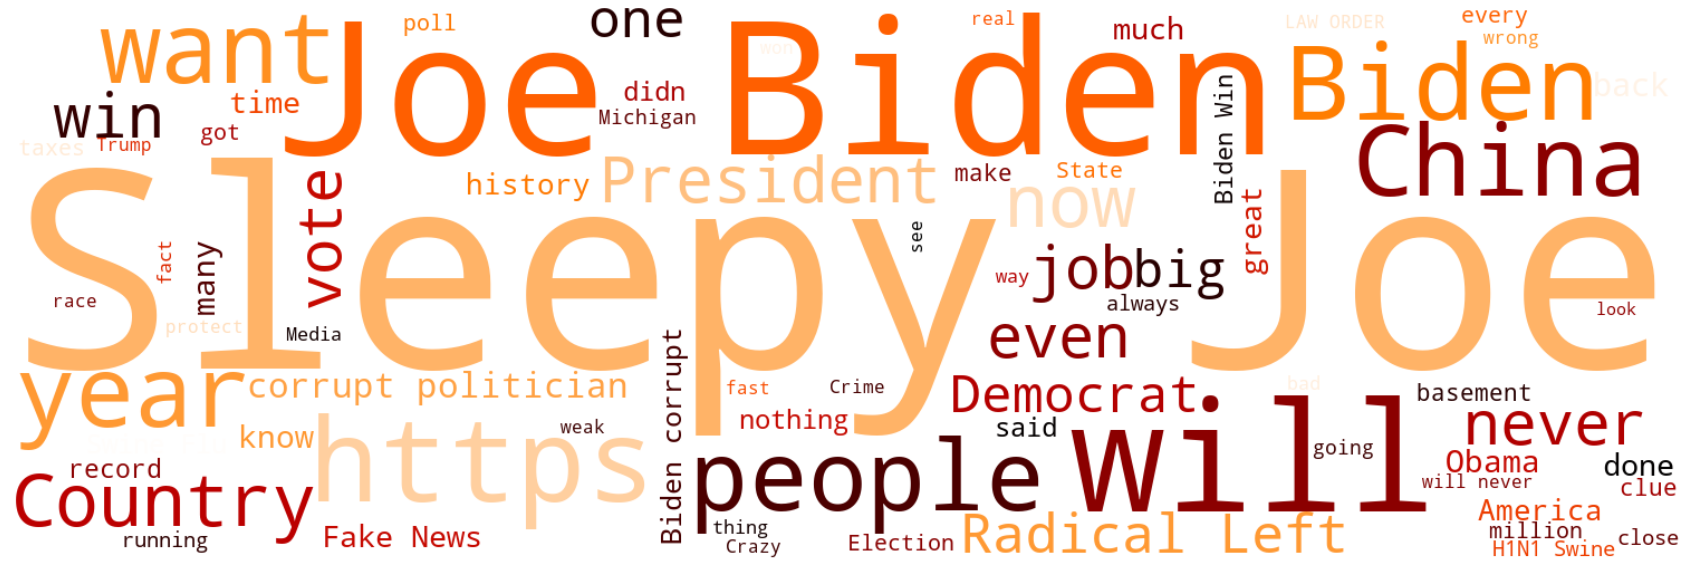

In [19]:
df_media=df.loc[df['target']=='joe-biden']
tweet_text = ' '.join(df_media['tweet'].tolist())
stopwords=set(STOPWORDS)
wordcloud = WordCloud(width=1500, height=500, stopwords=stopwords, max_font_size=500, 
                      max_words=75, min_word_length = 3, colormap="gist_heat", 
                      background_color="white").generate(tweet_text)
plt.subplots(figsize=(30,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

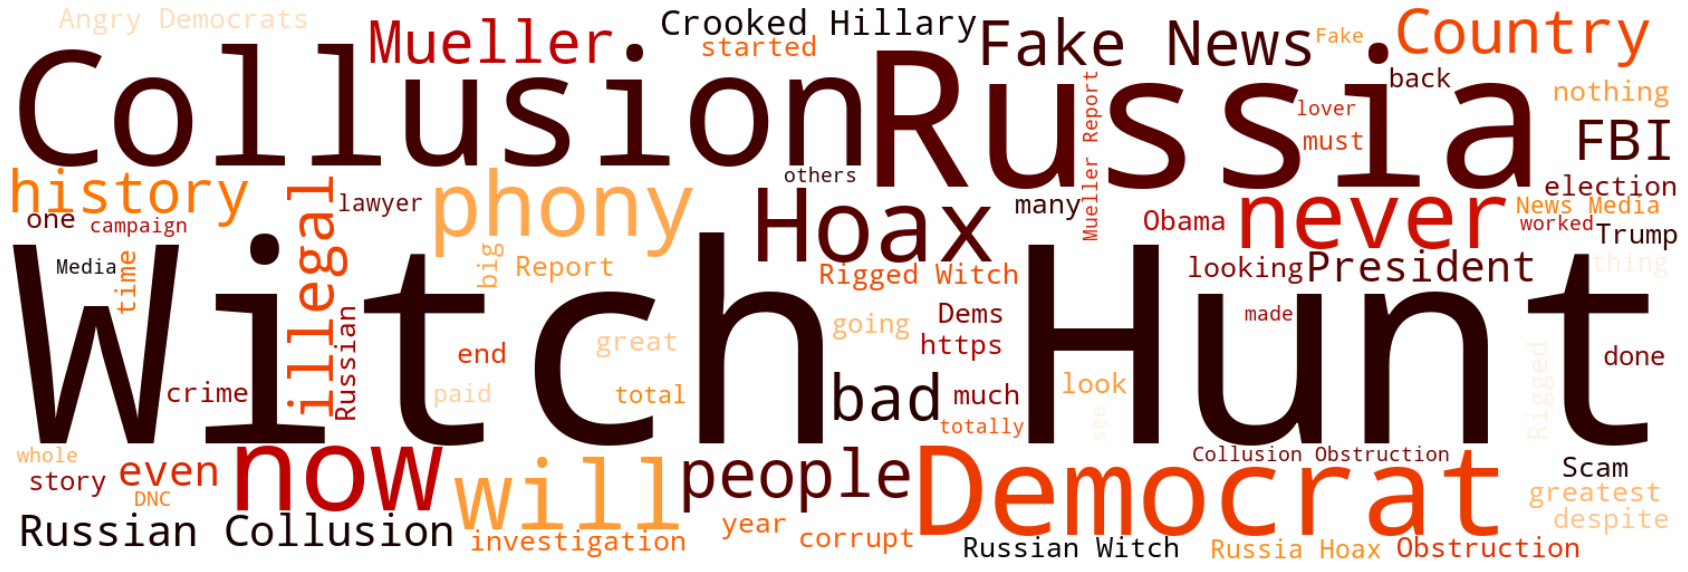

In [20]:
df_media=df.loc[df['target']=='trump-russia']
tweet_text = ' '.join(df_media['tweet'].tolist())
stopwords=set(STOPWORDS)
wordcloud = WordCloud(width=1500, height=500, stopwords=stopwords, max_font_size=500, 
                      max_words=75, min_word_length = 3, colormap="gist_heat", 
                      background_color="white").generate(tweet_text)
plt.subplots(figsize=(30,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Ниже представлен анализ настроения твитов трампа созданный при помощи библиотеки TextBlob. Все твиты делятся на позитивные, негативные и нейтральные.

In [21]:
features=df.values
#=== 
processed_features = []

for sentence in range(0, len(features)):
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))
    processed_feature = re.sub('https?:\/\/\S+', '', processed_feature)
    processed_feature = re.sub('https', '', processed_feature)
    processed_feature = re.sub('http', '', processed_feature)
    processed_feature= re.sub(r'\s+[a-zA-Z0-9]\s+', ' ', processed_feature)
    processed_feature = re.sub(r'\^[a-zA-Z0-9]\s+', ' ', processed_feature) 
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [22]:
df2=pd.DataFrame()
df2['Tweets']=processed_features

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return  TextBlob(text).sentiment.polarity

df2['Subjectivity'] = df2['Tweets'].apply(getSubjectivity)
df2['Polarity'] = df2['Tweets'].apply(getPolarity)

In [23]:
def getAnalysis(score):
    if score < 0:
        return 'Негативные'
    elif score == 0:
        return 'Нейтральные'
    else:
        return 'Позитивные'
df2['Analysis'] = df2['Polarity'].apply(getAnalysis)
df2

Tweets  Subjectivity  \
0       2014 10 09 thomas frieden fool can you believ...      0.000000   
1       2014 10 09 thomas frieden dope can you believ...      0.000000   
2       2015 06 16 politicians all talk and no action...      0.210000   
3       2015 06 24 ben cardin it politicians like car...      0.000000   
4       2015 06 24 neil young total hypocrite for the...      0.633333   
...                                                  ...           ...   
10355   2021 01 06 2020 election many states want to ...      0.350000   
10356   2021 01 06 2020 election based on irregularit...      0.680000   
10357   2021 01 06 2020 election our election process...      0.311111   
10358   2021 01 06 2020 election fraud the states wan...      0.733333   
10359   2021 01 06 chuck todd sleepy eyes sad to watc...      0.880000   

       Polarity     Analysis  
0      0.000000  Нейтральные  
1      0.000000  Нейтральные  
2      0.140000   Позитивные  
3      0.000000  Нейтральные  
4      0.033333   Позитивные  
...         ...          ...  
10355  0.450000   Позитивные  
10356 -0.065000   Негативные  
10357 -0.183333   Негативные  
10358  0.433333   Позитивные  
10359 -0.100000   Негативные  

[10360 rows x 4 columns]

In [24]:
Нейтральные = len(df2[df2['Analysis']=='Нейтральные'])
Негативные = len(df2[df2['Analysis']=='Негативные'])
Позитивные = len(df2[df2['Analysis']=='Позитивные'])
labels = ['Негативные','Позитивные','Нейтральные']
values = [Негативные,Позитивные,Нейтральные]
#====
import plotly.graph_objects as go
colors = ['red','green', 'lightblue' ]

fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,textposition='inside',
                  marker=dict(colors=colors, line=dict(color='grey', width=1)))
fig.show()